In [2]:
%pip install tomotopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\amcga\envs\citation-deaths\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import sys
import tomotopy as tp

In [14]:
mdl = tp.LDAModel(tw=tp.TermWeight.ONE, min_cf=3, rm_top=5, k=100)
for n, line in enumerate(open('export_dataframe.csv', encoding='utf-8')):
    if n == 0:
        continue
        
    title = line.split(",")[-1]
    ch = title.lower().strip().split()
    mdl.add_doc(ch)
                
mdl.burn_in = 100
mdl.train(0)

In [ ]:
lls = []

for i in range(0, 100, 10):
    mdl.train(10)
    #print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))
    lls.append(mdl.ll_per_word)

In [16]:
from matplotlib import pyplot as plt

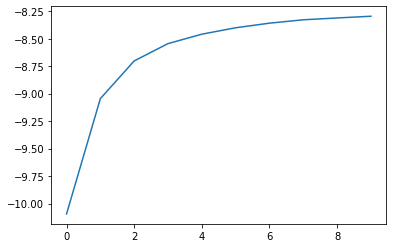

In [17]:
plt.plot(lls)

In [18]:
for i in range(0, 300, 10):
    mdl.train(10)
    #print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))
    lls.append(mdl.ll_per_word)

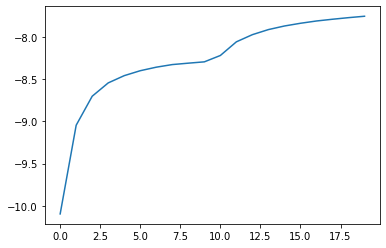

In [19]:
plt.plot(lls)

In [20]:
mdl.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 138124 docs, 1108573 words
| Total Vocabs: 136878, Used Vocabs: 16105
| Entropy of words: 7.60191
| Entropy of term-weighted words: 7.60191
| Removed Vocabs: for of and in a
|
<Training Info>
| Iterations: 200, Burn-in steps: 100
| Optimization Interval: 10
| Log-likelihood per word: -7.75634
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 3 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 5 (the number of top words to be removed)
| k: 100 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2196609070 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distribu

In [21]:
mdl.save('lda1.bin', True)